# **Data Communication Networks**

## **Anomaly Detection in Network Traffic**

Code Authors:

*   Bandi, Om Preetham
*   Korlakunta, Reddy Bhuvan
*   Polsani, Akhil
*   Ullendula, Thriveen

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time
import multiprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
df.shape

(125973, 43)

In [4]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


As we can see 'land', 'urgent', 'numfailedlogins', 'numoutboundcmds' have mostly zero values so we can drop these columns.

In [5]:
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [6]:
df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [7]:
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


As we are focussing on Binomial Classification for this dataset, we can make all other classes other than normal as 'attack'

In [8]:
df['attack'].loc[df['attack']!='normal']='attack'

In [9]:
le=LabelEncoder()

In [10]:
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

<Axes: >

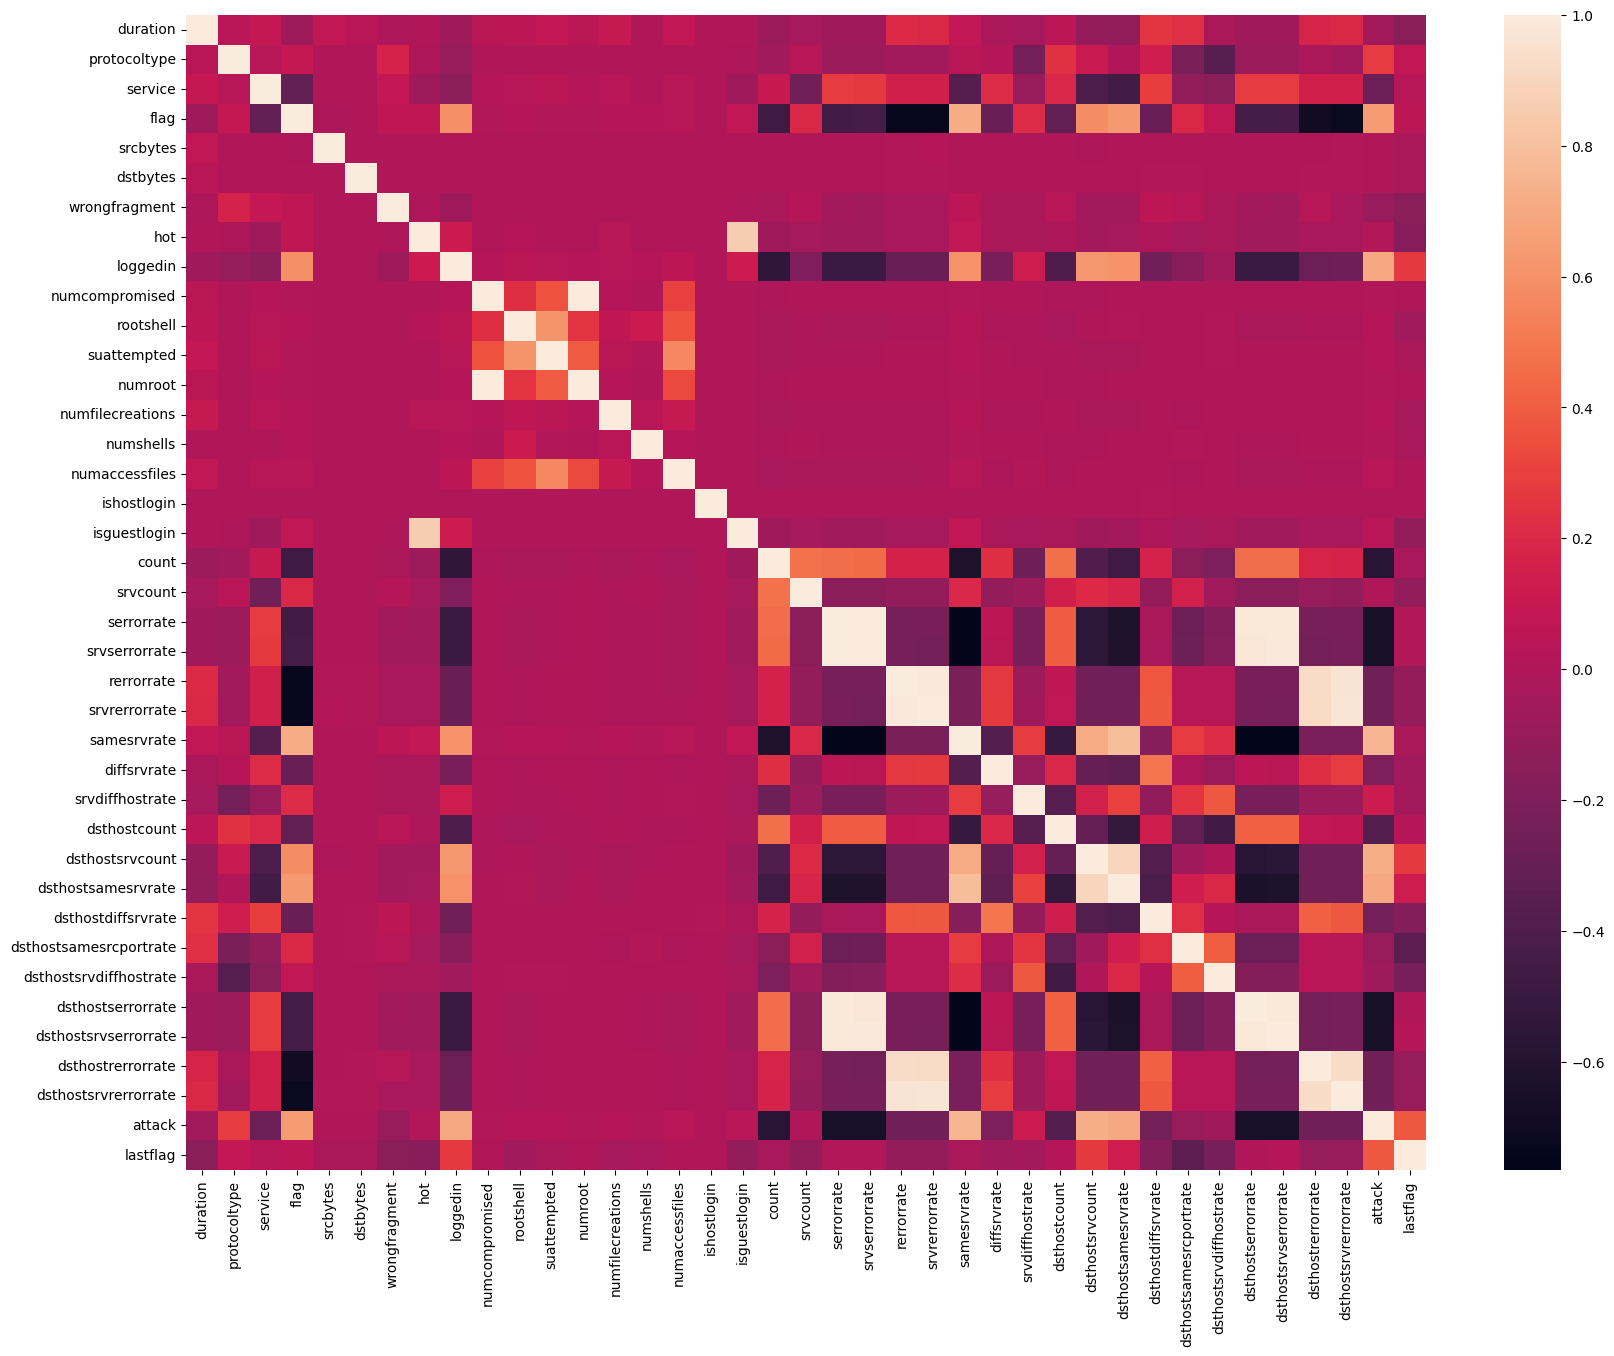

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

In [12]:
X=df.drop(['attack'],axis=1)
y=df['attack']

<Axes: ylabel='count'>

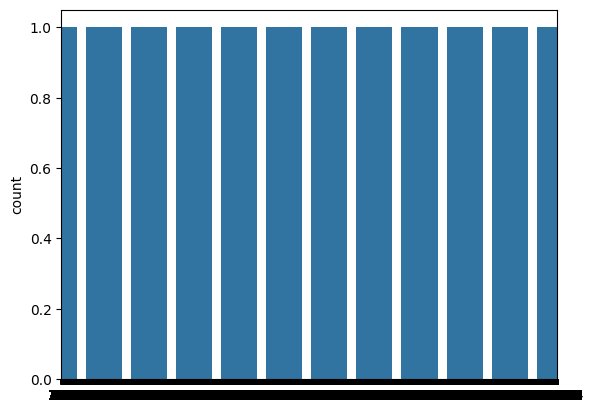

In [13]:
sns.countplot(df['attack'])

In [14]:
print("Class distribution: {}".format(Counter(y)))

Class distribution: Counter({1: 67343, 0: 58630})


In [15]:
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

## **Logistic Regression**

In [16]:
lr=LogisticRegression()
lr.fit(X_transformed,y)
lr_pred=lr.predict(X_transformed)

In [17]:
lr_df=pd.DataFrame()
lr_df['actual']=y
lr_df['pred']=lr_pred

In [18]:
lr_df.head()

,actual,pred
0,1,1
1,1,0
2,0,0
3,1,1
4,1,1


In [19]:
print(accuracy_score(y, lr_pred))

0.9783207512720979


In [20]:
confusion_matrix(y, lr_pred)

array([[57558,  1072],
       [ 1659, 65684]])

In [21]:
print(classification_report(y, lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     58630
           1       0.98      0.98      0.98     67343

    accuracy                           0.98    125973
   macro avg       0.98      0.98      0.98    125973
weighted avg       0.98      0.98      0.98    125973



## **Random Forest Classifier**

In [22]:
rf=RandomForestClassifier()
rf.fit(X_transformed,y)
rf_pred=rf.predict(X_transformed)

In [23]:
rf_df=pd.DataFrame()
rf_df['actual']=y
rf_df['pred']=rf_pred
rf_df.head()

,actual,pred
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [24]:
print(accuracy_score(y, rf_pred))

1.0


In [25]:
confusion_matrix(y, rf_pred)

array([[58630,     0],
       [    0, 67343]])

In [26]:
print(classification_report(y, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58630
           1       1.00      1.00      1.00     67343

    accuracy                           1.00    125973
   macro avg       1.00      1.00      1.00    125973
weighted avg       1.00      1.00      1.00    125973



**We can see Random Forest Classifier is giving better accuracy in comparison to Logistic Regression.**

Using Random Forest Classifier Model on test data:

In [27]:
test_df = pd.read_csv("/content/Test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
test_df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [28]:
test_df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,private,REJ,neptune
1,tcp,private,REJ,neptune
2,tcp,ftp_data,SF,normal
3,icmp,eco_i,SF,saint
4,tcp,telnet,RSTO,mscan
...,...,...,...,...
22539,tcp,smtp,SF,normal
22540,tcp,http,SF,normal
22541,tcp,http,SF,back
22542,udp,domain_u,SF,normal


In [29]:
test_df['attack'].loc[test_df['attack']!='normal']='attack'

In [30]:
test_df['protocoltype']=le.fit_transform(test_df['protocoltype'])
test_df['service']=le.fit_transform(test_df['service'])
test_df['flag']=le.fit_transform(test_df['flag'])
test_df['attack']=le.fit_transform(test_df['attack'])

In [31]:
test_df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [32]:
X_test=test_df.drop(['attack'],axis=1)
y_test=test_df['attack']

<Axes: ylabel='count'>

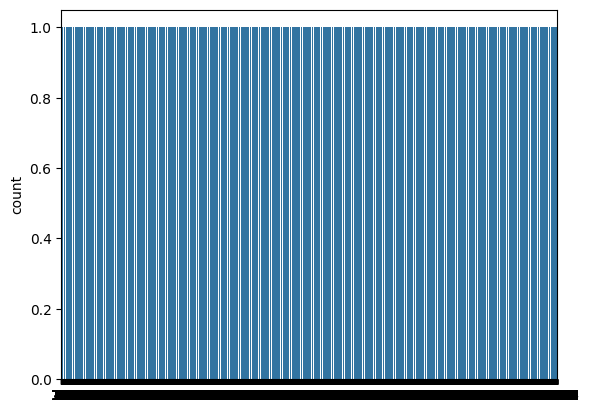

In [33]:
sns.countplot(test_df['attack'])

In [34]:
X_test_transformed = scaler.transform(X_test)

In [35]:
test_pred=rf.predict(X_test_transformed)

In [36]:
rf_test_df=pd.DataFrame()
rf_test_df['actual']=y_test
rf_test_df['pred']=test_pred

In [37]:
rf_test_df.head()

,actual,pred
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1


In [38]:
print(accuracy_score(y_test, test_pred))

0.8226579134137686


In [39]:
target_names=["attack","normal"]

In [40]:
print(classification_report(y_test, test_pred,target_names=target_names))

              precision    recall  f1-score   support

      attack       0.97      0.71      0.82     12833
      normal       0.72      0.97      0.83      9711

    accuracy                           0.82     22544
   macro avg       0.84      0.84      0.82     22544
weighted avg       0.86      0.82      0.82     22544



In [41]:
confusion_matrix(y_test, test_pred)

array([[9101, 3732],
       [ 266, 9445]])

In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

In [43]:
print("True Negatives:",tn)
print("False Positives:",fp)
print("False Negatives:",fn)
print("True Positives:",tp)

True Negatives: 9101
False Positives: 3732
False Negatives: 266
True Positives: 9445


## **Support Vector Machine (SVM)**

In [44]:
from sklearn.svm import SVC

# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_transformed, y)

# Make predictions on the test set
svm_pred = svm_model.predict(X_test_transformed)

# Evaluate the SVM model
print("\nSVM Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))



SVM Metrics:
Accuracy: 0.8576561391057488
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.86     12833
           1       0.77      0.96      0.85      9711

    accuracy                           0.86     22544
   macro avg       0.87      0.87      0.86     22544
weighted avg       0.88      0.86      0.86     22544



## **K-Nearest Neighbors (KNN)**

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_transformed, y)

# Make predictions on the test set
knn_pred = knn_model.predict(X_test_transformed)

# Evaluate the KNN model
print("\nKNN Metrics:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))



KNN Metrics:
Accuracy: 0.826472675656494
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.72      0.82     12833
           1       0.72      0.97      0.83      9711

    accuracy                           0.83     22544
   macro avg       0.85      0.84      0.83     22544
weighted avg       0.86      0.83      0.83     22544



## **Decision Tree Classifier**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_transformed, y)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test_transformed)

# Evaluate the Decision Tree model
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))


Decision Tree Metrics:
Accuracy: 0.840888928317956
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84     12833
           1       0.74      0.98      0.84      9711

    accuracy                           0.84     22544
   macro avg       0.86      0.86      0.84     22544
weighted avg       0.87      0.84      0.84     22544



## **Gradient Boosting Classifier**

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_transformed, y)

# Make predictions on the test set
gb_pred = gb_model.predict(X_test_transformed)

# Evaluate the Gradient Boosting model
print("\nGradient Boosting Metrics:")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))


Gradient Boosting Metrics:
Accuracy: 0.8565915542938254
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86     12833
           1       0.76      0.97      0.85      9711

    accuracy                           0.86     22544
   macro avg       0.87      0.87      0.86     22544
weighted avg       0.88      0.86      0.86     22544



## **Artificial Neural Network (ANN)**

In [45]:
from sklearn.neural_network import MLPClassifier

# Create and train the ANN model
ann_model = MLPClassifier()
ann_model.fit(X_transformed, y)

# Make predictions on the test set
ann_pred = ann_model.predict(X_test_transformed)

# Evaluate the ANN model
print("\nANN Metrics:")
print("Accuracy:", accuracy_score(y_test, ann_pred))
print("Classification Report:\n", classification_report(y_test, ann_pred))



ANN Metrics:
Accuracy: 0.8678140525195174
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87     12833
           1       0.78      0.97      0.86      9711

    accuracy                           0.87     22544
   macro avg       0.87      0.88      0.87     22544
weighted avg       0.89      0.87      0.87     22544

